# AUSTRALIA vs CHINA vs RUSSIA vs CANADA vs BRAZIL GHG

In [13]:
#Import Librarys 

import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [14]:
ghg_emissions = pd.read_excel('/Users/Shiva/Documents/DATA_ANALYTICS/Week6/Project/DataSets/caitcountryghgemissions-alldata.xlsx', header=[0,1] , sheet_name='GHG Emissions')

In [15]:
ghg_emissions[('Unnamed: 0_level_0','Country')].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua & Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'European Union (15)', 'European Union (28)', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Gu

In [16]:
#Cleaning

ghg_emissions_filt = ghg_emissions.loc[ghg_emissions[('Unnamed: 0_level_0','Country')].isin(['Canada','Australia','Russian Federation','China', 'Brazil'])].reset_index()

ghg_emissions_filt.columns = ghg_emissions_filt.columns.droplevel()

ghg_emissions_filt.drop(columns = '', inplace = True)

In [17]:
ghg_year = ghg_emissions_filt[['Country','Year','Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)']]


In [18]:
### PLot This vs YEAR 

ds_pivot = ghg_year.pivot(index='Year', columns='Country', values='Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)')

ds_pivot.columns = [x for x in ds_pivot.columns.values]

## FILL WITH THE MEAN
ds_pivot.fillna(ds_pivot['Russian Federation'].mean(), inplace = True)

In [24]:
ds_pivot.mean()

Australia              580.502165
Brazil                1765.632752
Canada                 788.377822
China                 5809.622030
Russian Federation    2252.184271
dtype: float64

In [19]:
ds_pivot.describe()

,Australia,Brazil,Canada,China,Russian Federation
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,580.502165,1765.632752,788.377822,5809.622030,2252.184271
std,63.292907,139.569926,134.124996,2469.035906,198.651253
min,495.611600,1606.594600,602.979800,3158.949200,2007.726800
25%,512.384150,1661.636400,667.937150,4051.379200,2137.681600
50%,597.587800,1731.284800,796.019300,4504.520800,2213.304400
75%,627.510400,1801.064000,867.570500,7938.454200,2259.003700
max,685.052900,2056.990300,1002.776000,10684.286600,2831.496300


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23066550>,
      dtype=object)

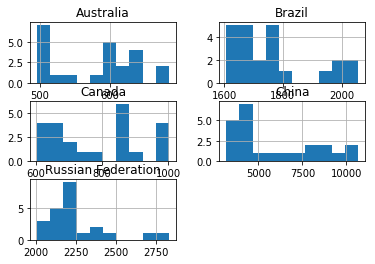

In [8]:
ds_pivot.hist()

# Statistical analysis 

In [9]:
### ANOVA analyse on variance 

#H0 : There is no difference between GHG emissions on ITALY AND PORTUGAL 

#significance level = 0.05


stats.f_oneway(ds_pivot['Canada'], ds_pivot['Australia'],ds_pivot['Russian Federation'],ds_pivot['China'], ds_pivot['Brazil'])



F_onewayResult(statistic=82.97934394296489, pvalue=2.566125614929961e-32)

In [10]:
"""
There is a difference in the total emission of ghg from the different coutries. Reject null hypotesis. 

"""

'\nThere is a difference in the total emission of ghg from the different coutries. Reject null hypotesis. \n\n'

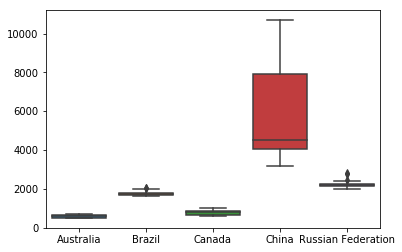

In [11]:
sns.boxplot(data = ds_pivot)

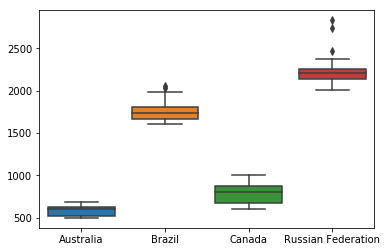

In [12]:
sns.boxplot(data = ds_pivot.drop(columns = 'China'))

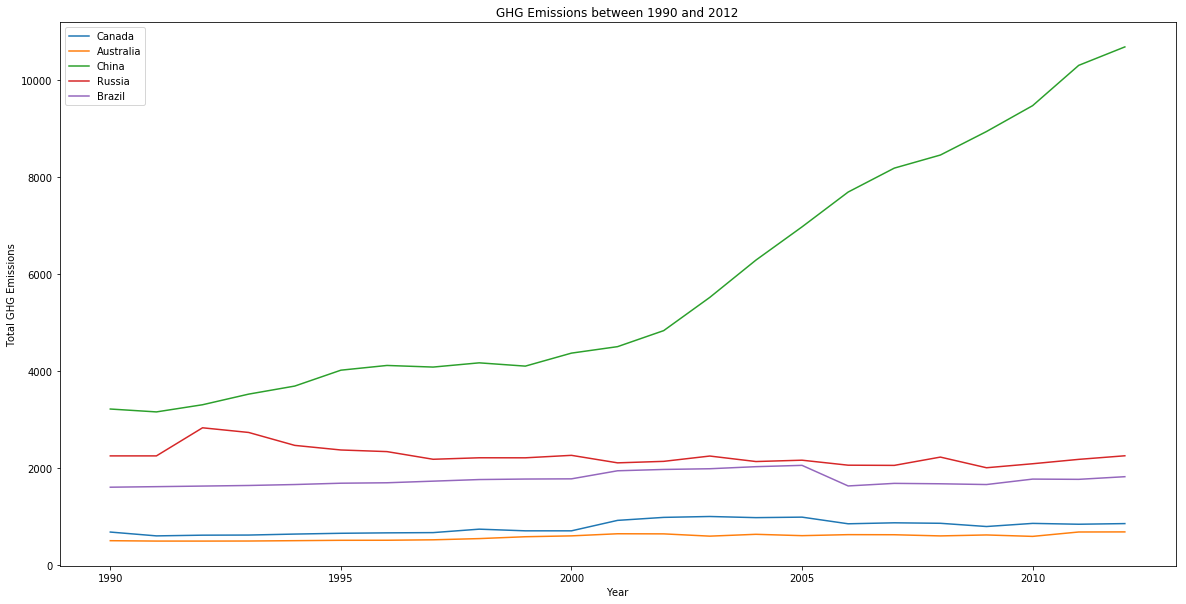

In [25]:
# your code here
fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(ds_pivot['Canada'], label='Canada')
plt.plot(ds_pivot['Australia'], label='Australia')
plt.plot(ds_pivot['China'], label='China') 
plt.plot(ds_pivot['Russian Federation'], label='Russia')
plt.plot(ds_pivot['Brazil'], label='Brazil') 

#plt.xscale('linear')  # to linear scale uncomment this one! and the on bellow and coment the two lines up
#plt.yscale('linear')


plt.xlabel('Year')
plt.ylabel('Total GHG Emissions')

plt.title("GHG Emissions between 1990 and 2012")
plt.legend()
plt.show()



In [26]:
ds_pivot.corr()

,Australia,Brazil,Canada,China,Russian Federation
Australia,1.000000,0.556142,0.807227,0.769785,-0.645026
Brazil,0.556142,1.000000,0.795447,0.159888,-0.348803
Canada,0.807227,0.795447,1.000000,0.569863,-0.608873
China,0.769785,0.159888,0.569863,1.000000,-0.515832
Russian Federation,-0.645026,-0.348803,-0.608873,-0.515832,1.000000


In [ ]:
## China is an interesting case as you can see It looks like it follows an increase throught the years 